In [4]:
from IPython.core.interactiveshell import import_item
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

base = '/content/COVID-19_Radiography_Dataset/'

In [8]:
folders = os.listdir(base)
print(folders)

['Normal', 'Lung_Opacity', 'COVID', 'Viral Pneumonia']


In [9]:
%%time

Data, Lables = [], []

for item in folders:
    new_path = os.path.join(base, item)
    new_path += '/images'
    for img in os.listdir(new_path):
        img_path = os.path.join(new_path, img)
        Data.append(np.array(cv2.resize(cv2.imread(img_path).astype('float32') / 255.0, (200,200))))
        Lables.append(folders.index(item))

CPU times: user 1min 5s, sys: 46.6 s, total: 1min 52s
Wall time: 1min


In [10]:
x_train, x_test, y_train, y_test = train_test_split(Data, Lables, test_size = .2, random_state = 1)

In [11]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
efficientnet = keras.applications.efficientnet.EfficientNetB0(input_shape = x_train[0].shape, weights = 'imagenet', include_top = False)

16719872/16705208 [==============================] - 0s 0us/step


In [13]:
for layer in efficientnet.layers:
  layer.trainable = False

In [14]:
x = keras.layers.Flatten()(efficientnet.output)

In [15]:
prediction = keras.layers.Dense(len(folders), activation = 'softmax')(x)

In [16]:
model = keras.models.Model(efficientnet.input, prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 200, 200, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 200, 200, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 201, 201, 3)  0           ['normalization[0][0]']      

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
%%time
history = model.fit(x_train, y_train, batch_size = 32, epochs = 30, validation_data = (x_test, y_test))

Epoch 1/30
530/530 [==============================] - 573s 1s/step - loss: 1.8817 - accuracy: 0.3709 - val_loss: 2.0744 - val_accuracy: 0.4826
Epoch 2/30
530/530 [==============================] - 572s 1s/step - loss: 2.1157 - accuracy: 0.3643 - val_loss: 1.2621 - val_accuracy: 0.4826
Epoch 3/30
530/530 [==============================] - 573s 1s/step - loss: 2.1130 - accuracy: 0.3692 - val_loss: 2.5047 - val_accuracy: 0.4826
Epoch 4/30
530/530 [==============================] - 572s 1s/step - loss: 2.2017 - accuracy: 0.3623 - val_loss: 2.0946 - val_accuracy: 0.0626
Epoch 5/30
530/530 [==============================] - 577s 1s/step - loss: 2.1187 - accuracy: 0.3600 - val_loss: 2.8848 - val_accuracy: 0.1675
Epoch 6/30
530/530 [==============================] - 573s 1s/step - loss: 2.0307 - accuracy: 0.3712 - val_loss: 2.9024 - val_accuracy: 0.2873
Epoch 7/30
530/530 [==============================] - 573s 1s/step - loss: 2.0679 - accuracy: 0.3672 - val_loss: 2.2567 - val_accuracy: 0.4826

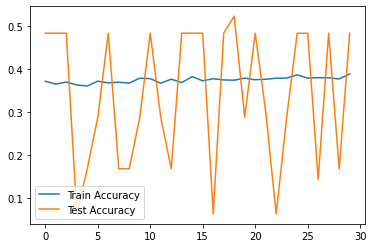

In [22]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.legend()
plt.show()

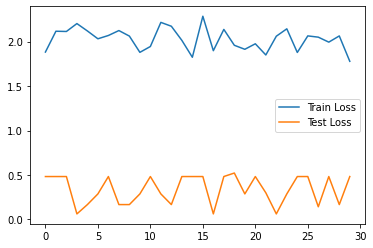

In [23]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_accuracy'], label = 'Test Loss')
plt.legend()
plt.show()

In [24]:
model.evaluate(x_test, y_test)

133/133 [==============================] - 109s 822ms/step - loss: 4.5953 - accuracy: 0.4826


[4.595336437225342, 0.482636421918869]